# Pseudo-biases with vector velocities

Investigate pseudo-biases in vector velocity / magnitude data. Pseudo-biases are biases that are not characteristigs of the observations, but arise from the non-linear transformation from vector components to vector velocity / magnitude.

Consider a vector field with components $(dX,dY)$. The true vector ield is $T=(tX,tY)$, with observations $O=(oX,oY)$. $oX$ (resp. $oY$) are un-biased observations of $tX$ (resp. $tY$) with uncertainties $uX$ and $uY$.

We will see that, despite $oX$ and $oY$ being un-biased observations, the observed velocity $oV = \sqrt{oX^2+oY^2}$ is biased *wrt* the true velocity $tV = \sqrt{tX^2+tY^2}$.

Inspired / adapted from Appendix B of Stoffelen (1998).

Stoffelen, A. (1998), Toward the true near-surface wind speed: Error modeling and calibration using triple collocation, J. Geophys. Res., 103( C4), 7755– 7766, doi:10.1029/97JC03180.

In [1]:
import numpy as np
from numpy.random import default_rng
from matplotlib import pylab as plt
import matplotlib.lines as mlines

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [2]:
rng = default_rng()
N = 5000

def velocity(dX, dY):
    return (dX**2 + dY**2)**0.5

Define the (unknown) truth for $dX$, $dY$, and velocity

In [3]:
sig_t = 17.
tX = rng.standard_normal(N) * sig_t
tY = rng.standard_normal(N) * sig_t
tV = velocity(tX, tY)

Define an un-biased observation of the truth, with uncertainties

In [4]:
# uncertain observations of dX
sig_ux = 10
ux = rng.standard_normal(N) * sig_ux
oX = tX + ux

# uncertain observations of dY
sig_uy = 10
uy = rng.standard_normal(N) * sig_uy
oY = tY + uy

# observation of the velocity (derived from oX and oY)
oV = velocity(oX, oY)

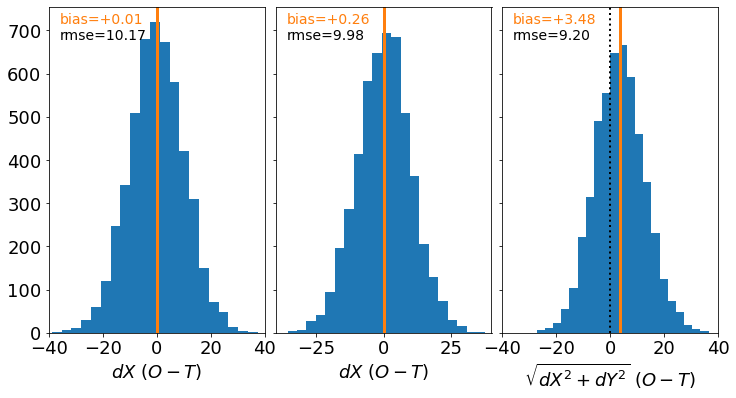

In [5]:

def plot_hist(ax, d, w, maxu):
    ax.hist(d, bins=21)
    ax.set_xlabel(w + r" $(O-T)$")
    ax.set_xlim(-maxu,+maxu)
    ax.axvline(x=0, color='k', ls=':', lw=2)
    bias = d.mean()
    rmse = d.std()
    ax.axvline(x=bias, color='C1', ls='-', lw=3)
    fs = 14
    ystep = 0.05
    ystart = 0.95
    ax.text(0.05,ystart,'bias={:+.2f}'.format(bias),transform=ax.transAxes, fontsize=fs, color='C1'); ystart -= ystep
    ax.text(0.05,ystart,'rmse={:.2f}'.format(rmse),transform=ax.transAxes, fontsize=fs); ystart -= ystep
    
maxu = 4*max(sig_ux,sig_uy)
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,3,1)
plot_hist(ax, oX - tX, r"$dX$", maxu)

ax = fig.add_subplot(1,3,2,sharey=ax)
plot_hist(ax, oY - tY, r"$dX$", maxu)
plt.setp(ax.get_yticklabels(), visible=False)

ax = fig.add_subplot(1,3,3,sharey=ax)
plot_hist(ax, oV - tV, r"$\sqrt{dX^2+dY^2}$", maxu)
plt.setp(ax.get_yticklabels(), visible=False)

plt.subplots_adjust(wspace=0.05)
plt.show()

We see that, despite  $oX$  and  $oY$  are un-biased observations of $tX$ and $tY$, the resulting observed velocity $oV$ (computed from $oX$ and $oY$) is biased *wrt* the true velocity $tV$.

